In [143]:
# Importing the required libraries
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import random
import math
import sys
%matplotlib inline

## Problem 1

In [128]:
# Function to create dataset, setting default level of separability and seed
def make_dataset(level_of_sep = 1, seed = 50):
    data = []
    vector = tc.tensor([1,1])
    labels = []
    count = 0
    random.seed(seed)
    # Loop runs till there are 1500 elements in data
    while len(data) < 1500:
        x = random.randint(1, 100)
        y = random.randint(1, 100)
        row = tc.tensor([x, y])
        
        # The points are classified by calculating their component along vector(1, 1)
        if (row * vector).sum() / 1.414 < 70 - level_of_sep / 2:
            labels.append(1)
            count += 1
            data.append(row)
        elif (row * vector).sum() / 1.414 > 70 + level_of_sep / 2:
            labels.append(0)
            data.append(row)
            
    data = tc.stack(data)
    return (data, labels)
        

In [129]:
def plot_data(data = [], weights = [], bias = 0, labels=[]):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', alpha=0.7, edgecolors='w')
    if len(weights) != 0:
        w1 = weights[0].item()
        w2 = weights[1].item()

        x_line = np.linspace(1, 100, 100)
        y_line = -w1 / w2 * x_line - bias.item() / w2
        plt.plot(x_line, y_line, label='Decision Boundary', color='purple', linestyle='--')


    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

In [130]:
class Perceptron:
    def __init__ (self, feature_len, l_rate = 0.01):
        
        # Intitialising weights, bias and learning rate
        self.weights = tc.zeros(feature_len)
        self.bias = 0
        self.l_rate = l_rate
    
    def act_function(self, val):
        if val >= 0:
            return 1
        else:
            return 0
        
    def percep_learning_algo(self, data, labels):
        epoch_error = 1
        num_epochs = 0
        while epoch_error != 0:
            epoch_error = 0
            for i in range(data.shape[0]):
                point = data[i, :]
                result = (point * self.weights).sum() + self.bias
                result = self.act_function(result)
                error = labels[i] - result
                
                self.weights += self.l_rate * error * point
                self.bias += self.l_rate * error
                epoch_error += error
                
            num_epochs += 1
           
        return num_epochs

In [131]:
perceptron = Perceptron(feature_len = 2, l_rate = 0.01)
data, labels = make_dataset(level_of_sep = 8)
num = perceptron.percep_learning_algo(data, labels)
print(f"Converged after {num} iterations")

Converged after 12 iterations


In [132]:
perceptron.weights

tensor([-0.1900, -0.2000])

In [213]:
perceptron.bias

tensor([126.7004])

## Before training

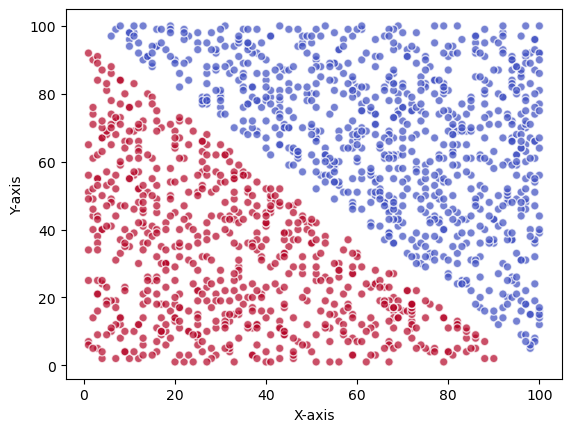

In [214]:
plot_data(data, labels=labels)

## After training

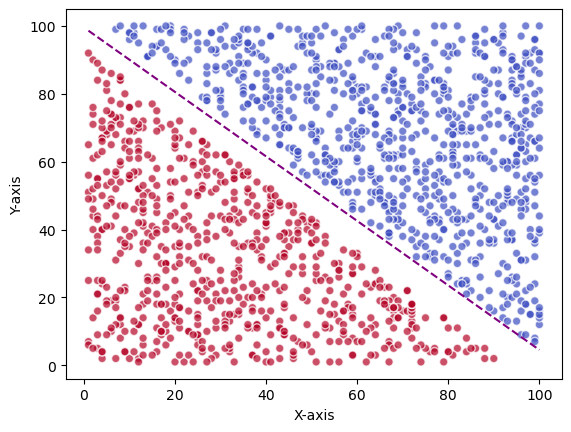

In [134]:
plot_data(data, perceptron.weights, bias=tc.tensor(perceptron.bias), labels=labels)

In [215]:
X = []
y = []
for i in range(5):
    avg_iterations = 0
    for j in range(5):
        perceptron = Perceptron(feature_len = 2, l_rate = 0.01)
        data, labels = make_dataset(level_of_sep = 2 * (i + 1), seed = 5 + j)
        num = perceptron.percep_learning_algo(data, labels)
        avg_iterations += num / 5
    X.append( 2 * (i + 1))
    y.append(avg_iterations)
print(f"Average iteration for increasing levels of separability {y}")


Average iteration for increasing levels of separability [30.4, 23.2, 15.8, 13.2, 12.0]


Text(0.5, 1.0, 'Perceptron convergence')

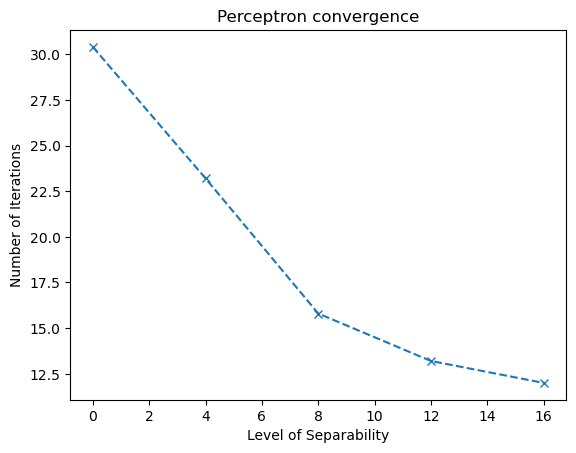

In [142]:
plt.plot(X, y, label='Line Plot', linestyle='--', marker='x')

# Add labels and a legend
plt.xlabel('Level of Separability')
plt.ylabel('Number of Iterations')
plt.title('Perceptron convergence')

### As the level of separability increases the average number of iterations taken by the perceptron learning alogrithm to converge decreases, as seen in the graph above.

## Problem 2
### I have chosen binary cross entropy as the loss function as we are performing binary classification and sigmoid as activation function as it works well with BCE.

In [204]:
class Perceptron_grad:
    def __init__ (self, feature_len, l_rate = 0.01):
        self.weights = tc.tensor([0.0, 0.0])
        self.bias = tc.tensor([1.0])
        self.l_rate = l_rate
    

        
    def grad_descent(self, data, labels):
        prev_loss = sys.maxsize
        prev_weights = tc.empty(2)
        for j in range(100):
            total_loss = 0
            for i in range(data.shape[0]):
                point = data[i, :].float()
                w_sum = (self.weights * point).sum() + self.bias
                act_output = tc.sigmoid(w_sum)
                act_output = tc.clamp(act_output, 1e-5, 1 - 1e-5)
                BSE_loss = - (labels[i] * tc.log(act_output).item() + (1 - labels[i]) * tc.log(1 - act_output).item())
#                 print(f"{BSE_loss}")
                total_loss += BSE_loss
                grad_w = ((((1 - labels[i]) / (1 - act_output) - labels[i] / act_output) * act_output * (1 - act_output)) *  point)

                grad_b = ((1 - labels[i] / (1 - act_output) - labels[i] / act_output) * act_output * (1 - act_output)).sum()

                self.weights += -1 * self.l_rate * grad_w
                self.bias += -1 * self.l_rate * grad_b
            prev_weights = self.weights
            


            print(f"Epoch {j + 1} with BCE loss {total_loss}.")
            if total_loss < 1:
                return
           
            prev_loss = total_loss


In [205]:
perceptron = Perceptron_grad(feature_len = 2, l_rate = 0.01)
data, labels = make_dataset(level_of_sep=5)
labels = np.array(labels)
data = data.float()

perceptron.grad_descent(data, labels)

Epoch 0 with BCE loss 6525.831998520964.
Epoch 1 with BCE loss 5623.717674156799.
Epoch 2 with BCE loss 5446.985296639502.
Epoch 3 with BCE loss 4610.657719797264.
Epoch 4 with BCE loss 4313.618209360808.
Epoch 5 with BCE loss 3728.7830911320752.
Epoch 6 with BCE loss 3482.4613894502045.
Epoch 7 with BCE loss 3007.1829242313934.
Epoch 8 with BCE loss 2924.954325485982.
Epoch 9 with BCE loss 2573.9435427409962.
Epoch 10 with BCE loss 1955.2808642909522.
Epoch 11 with BCE loss 1714.7460224524912.
Epoch 12 with BCE loss 1225.878452644145.
Epoch 13 with BCE loss 1336.6352589650742.
Epoch 14 with BCE loss 913.8375296809236.
Epoch 15 with BCE loss 733.0249278444271.
Epoch 16 with BCE loss 1258.63663957666.
Epoch 17 with BCE loss 296.69214489444767.
Epoch 18 with BCE loss 0.3811195012785902.


In [206]:
perceptron.weights

tensor([-1.2734, -1.2803])

In [211]:
perceptron.bias


tensor([126.7004])

## Before

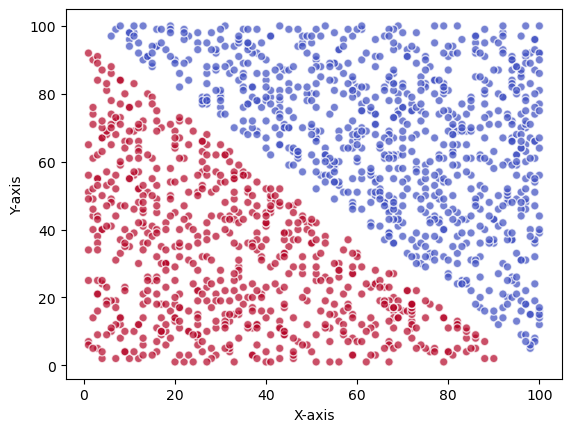

In [212]:
plot_data(data, labels=labels)

## After

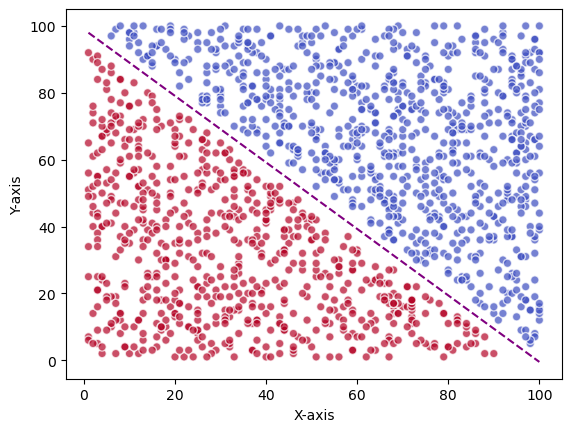

In [208]:
plot_data(data, perceptron.weights, bias=perceptron.bias, labels=labels)

# Problem 3
### I have used the same loss function BCE along with sigmoid activation function.

In [16]:
def mlp_dataset(level_of_sep = 1, seed = 50):
    data = []
    vector = tc.tensor([50,50])
    labels = []
    count = 0
    random.seed(seed)
    while len(data) < 2000:
        x = random.randint(1, 100)
        y = random.randint(1, 100)
        row = tc.tensor([x, y])
        dist = math.sqrt(((row - vector)**2).sum())
        if dist < 25 - level_of_sep / 2:
            labels.append(1)
            
            data.append(row)
        elif dist > 25 + level_of_sep / 2 and dist < 50 and count < 1000:
            labels.append(0)
            data.append(row)
            count += 1
    print(count)        
    data = tc.stack(data)
    return (data, labels)

1000


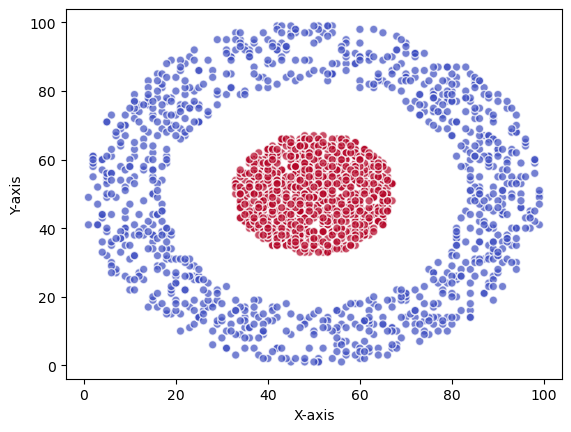

In [52]:
data, labels = mlp_dataset(level_of_sep=15, seed=5)
plot_data(data, labels = labels)



In [183]:
class MLP:
    def __init__ (self, feature_len = 2, l_rate = 0.01, hidden_layer_len = 3, seed=50):
        tc.manual_seed(seed)
        hid_layer_bound = np.sqrt(6.0 / (2 + hidden_layer_len))
        op_layer_bound = np.sqrt(6.0/(hidden_layer_len + 1))
        self.hidden_layer_len = hidden_layer_len
        self.hid_layer_weights = tc.FloatTensor(2 * hidden_layer_len).uniform_(-hid_layer_bound, hid_layer_bound)
        self.op_layer_weights = tc.FloatTensor(hidden_layer_len).uniform_(-op_layer_bound, op_layer_bound)
#         self.hid_layer_weights = tc.zeros(2 * hidden_layer_len)
#         self.op_layer_weights = tc.zeros(hidden_layer_len)
        self.bias = tc.FloatTensor(hidden_layer_len + 1).uniform_(-hid_layer_bound, hid_layer_bound)
        self.bias[hidden_layer_len] = tc.FloatTensor(1).uniform_(-op_layer_bound, op_layer_bound)
#         self.bias = tc.ones(hidden_layer_len + 1)
        self.l_rate = l_rate
        self.w_sums = tc.empty(hidden_layer_len + 1)
        self.op_layer_grads = tc.empty(hidden_layer_len)
        self.hid_layer_grad = tc.empty(hidden_layer_len * 2)
        self.bias_grad = tc.empty(hidden_layer_len + 1)
        
    def forward_prop(self, point):
        for i in range(self.hidden_layer_len):
            self.w_sums[i] = ((point[0].item() * self.hid_layer_weights[i].item() + point[1].item() * self.hid_layer_weights[i + self.hidden_layer_len].item()) + self.bias[i].item())
        
        act_output = tc.sigmoid(self.w_sums[:-1]) 
        act_output += 1e-10
        self.w_sums[self.hidden_layer_len] =  (act_output * self.op_layer_weights).sum() + self.bias[self.hidden_layer_len]
        final_output = tc.sigmoid(self.w_sums[self.hidden_layer_len])
        final_output += 1e-10
        return final_output
    
    def backward_prop(self, pred_value, true_value, point):
        act_outputs = tc.sigmoid(self.w_sums[:-1]) 
        act_outputs += 1e-10
        self.bias_grad[self.hidden_layer_len] = ((1 - true_value) / (1 - pred_value) - true_value / pred_value) * pred_value * (1 - pred_value)
#         print(f"op: {act_outputs}")
        self.op_layer_grads =  self.bias_grad[self.hidden_layer_len] * act_outputs
        

#         print(f"Act: {act_outputs}")
        
        self.bias_grad[:-1] = self.bias_grad[self.hidden_layer_len] * act_outputs * (1 - act_outputs) * self.op_layer_weights
        self.hid_layer_grad[:self.hidden_layer_len] = self.bias_grad[self.hidden_layer_len] * act_outputs * (1 - act_outputs) * point[0]
        self.hid_layer_grad[self.hidden_layer_len:] = self.bias_grad[self.hidden_layer_len] * act_outputs * (1 - act_outputs) * point[1]
        for i in range(self.hidden_layer_len):
            self.hid_layer_grad[i] *= self.op_layer_weights[i]
            self.hid_layer_grad[i + self.hidden_layer_len] *= self.op_layer_weights[i]
#         print(f"Hid grad: {self.hid_layer_grad}")
        
        self.bias[self.hidden_layer_len] += -1 * self.l_rate * self.bias_grad[self.hidden_layer_len]
        self.op_layer_weights += -1 * self.l_rate * self.op_layer_grads
        self.hid_layer_weights += -1 * self.l_rate * self.hid_layer_grad
        self.bias[:-1] += -1 * self.l_rate * self.bias_grad[:-1]


    def MLP_learning_algo(self, data, labels):
        prev_loss = sys.maxsize
        prev_hid_weights = tc.empty(2*self.hidden_layer_len)
        prev_op_weights = tc.empty(self.hidden_layer_len)
        prev_bias = tc.empty(self.hidden_layer_len + 1)
        
        for j in range(50):
            total_loss = 0
            for i in range(data.shape[0]):
                point = data[i, :].float()
                result = self.forward_prop(point)
#                 print(f"op: {result}")
                BSE_loss = - (labels[i] * tc.log(result).item() + (1 - labels[i]) * tc.log(1 - result).item())
#                 print(f"{BSE_loss}")
                total_loss += BSE_loss
#                     mag = tc.norm(grad_w, p=2).item()
#                     if mag != 0:
#                           grad_w = grad_w / mag
#                     grad_b = ((labels[i] / (1 - act_output) - labels[i] / act_output) * act_output * (1 - act_output)).sum()
#                     mag = tc.norm(grad_b, p=2).item()

                self.backward_prop(result, labels[i], point)
                prev_hid_weights = self.hid_layer_weights
                prev_op_weights = self.op_layer_weights
                prev_bias = self.bias
#                 print(tc.max(self.hid_layer_grad))

#             if prev_loss < total_loss:
#                 print(f"Stopped because loss is increasing")
#                 self.hid_layer_weights = prev_hid_weights
#                 self.op_layer_weights = prev_op_weights
#                 self.bias = prev_bias
                
#                 return
            print(f"Epoch {j} with BCE loss {total_loss}.")
            if total_loss < 1:
                return
           
            prev_loss = total_loss

In [185]:
mlp = MLP(feature_len = 2, l_rate = 0.1, seed=40, hidden_layer_len=10)
data, labels = mlp_dataset(level_of_sep=5, seed=5)
data = data.float()
mean = data.mean(dim=0)
std = data.std(dim=0)

normalized_data = (data - mean) / std
mlp.MLP_learning_algo(normalized_data, labels)

1000
Epoch 0 with BCE loss 769.3136845182162.
Epoch 1 with BCE loss 647.295333621325.
Epoch 2 with BCE loss 336.09647516091354.
Epoch 3 with BCE loss 182.72296804049984.
Epoch 4 with BCE loss 128.783380225359.
Epoch 5 with BCE loss 101.68102058845398.
Epoch 6 with BCE loss 85.12246187423443.
Epoch 7 with BCE loss 73.71108085872584.
Epoch 8 with BCE loss 65.22084968549552.
Epoch 9 with BCE loss 58.57739187963489.
Epoch 10 with BCE loss 53.19420042866409.
Epoch 11 with BCE loss 48.719946319489736.
Epoch 12 with BCE loss 44.928253722379736.
Epoch 13 with BCE loss 41.665109791604095.
Epoch 14 with BCE loss 38.821065079297625.
Epoch 15 with BCE loss 36.31603910790449.
Epoch 16 with BCE loss 34.08989141509099.
Epoch 17 with BCE loss 32.09672787684792.
Epoch 18 with BCE loss 30.30091566426549.
Epoch 19 with BCE loss 28.67463115256301.
Epoch 20 with BCE loss 27.195449831447107.
Epoch 21 with BCE loss 25.84533688821152.
Epoch 22 with BCE loss 24.60942147749185.
Epoch 23 with BCE loss 23.4752105

In [177]:
mlp.hid_layer_weights

tensor([-2.3886, -0.0227, -3.5739,  2.1120,  3.6170,  3.1669, -0.4638, -3.2264,
        -3.6065, -5.3244,  4.4704,  0.5834,  0.4798,  2.9192,  4.3533, -5.0360,
         1.6816, -4.0542,  1.4015,  0.2052])

In [178]:
mlp.hid_layer_grad

tensor([ 4.5068e-07,  1.8071e-07,  5.2220e-08, -7.1150e-08,  8.2961e-07,
         4.6993e-09,  3.6400e-07,  3.0532e-09,  7.9293e-08, -2.9357e-07,
         1.2495e-06,  5.0103e-07,  1.4478e-07, -1.9726e-07,  2.3001e-06,
         1.3029e-08,  1.0092e-06,  8.4650e-09,  2.1984e-07, -8.1391e-07])

In [179]:
mlp.bias

tensor([-5.1276, -0.4774, -4.0083,  2.0083, -5.3617, -5.6111, -1.3278, -5.5035,
        -4.2583,  4.6135, -1.1554])

49


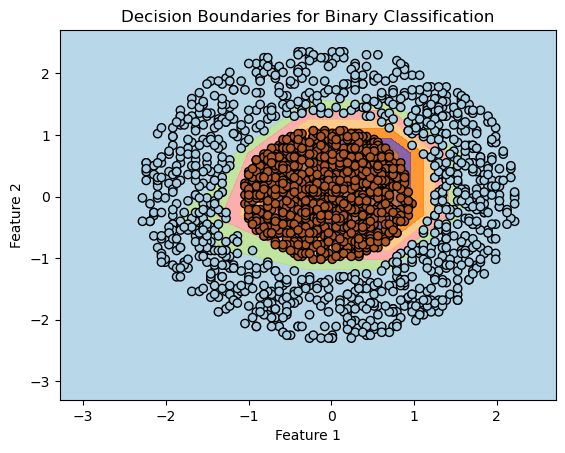

In [180]:
x_min, x_max = normalized_data[:, 0].min() - 1, normalized_data[:, 0].max() + 1
y_min, y_max = normalized_data[:, 1].min() - 1, normalized_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Flatten the meshgrid and stack the points together
mesh_points = np.c_[xx.ravel(), yy.ravel()]
print(len(mesh_points))
# Use the trained model to predict the class for each point in the meshgrid
Z = []
for i in range(len(mesh_points)):
    Z.append(mlp.forward_prop(mesh_points[i]))
Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for the original data points
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=labels, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Binary Classification')
plt.show()